# Kernel SVM Implementation:

In [ ]:
from numpy.random.mtrand import seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
np.random.seed(123)

In [ ]:
class SVMDualProblem:
  def __init__(self, C=1.0, kernel='rbf', sigma=0.1, degree=2):
    self.C = C
    if kernel == 'poly':
      self.kernel = self._polynomial_kernel
      self.c = 1
      self.degree = degree
    else:
      self.kernel = self._rbf_kernel
      self.sigma = sigma
    
    self.X =None
    self.y = None
    self.alpha = None
    self.b = 0
    self.ones = None
  
  def _rbf_kernel(self, X1, X2):
    return np.exp(-(1/sigma**2) * np.linalg.norm(X1[:, newaxis] - X2[newaxis:,], axis=2) ** 2)
  
  def _polynomial_kernel(self, X1, X2):
    return (self.c + X1.dot(X2.T)) ** self.degree
  
  def fit(self, X, y, lr=1e-3, epochs=100):
    self.X = X
    self.y = y

    self.alpha = np.random.random(X.shape)
    self.b = 0
    self.ones = np.ones(X.shape[0])
    y_iy_jk_ij = np.outer(y, y) * self.kernel(X, X)
    print(self.ones.shape)
    losses = []
    for _ in range(epochs):
      print(y_iy_jk_ij.dot(self.alpha).shape)
      gradient = self.ones - y_iy_jk_ij.dot(self.alpha)
      self.alpha = self.alpha * lr * gradient
      self.alpha[self.alpha > self.C] = self.C
      self.alpha[self.alpha < 0] = 0

      loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_iy_jk_ij)
      losses.append(loss)
    
    index = np.where((self.alpha > 0) & (self.aplha < self.C))[0]
    b_i = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
    self.b = np.mean(b_i)

    plt.plot(losses)
    plt.title('loss per epochs')
    plt.show()
  
  def _decision_function(self, X):
    return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b
  
  def predict(self, X):
    return np.sign(self._decision_function(X))
  
  def score(self, X, y):
    y_hat = self.predict(X)
    return np.mean(y == y_hat)
  
  def plot_decision_boundary(self):
    plt.figure(figsize=(8,8))
    plt.scatter(self.X[:,0], self.X[:,1], c=self.y, s=50, cmap='autumn', aplha=0.5)
    xlim = [np.min(X[:,0]), np.max(X[:,0])]
    ylim = [np.min(X[:,1]), np.max(X[:,1])]
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.column_stack((XX.flatten(), YY.flatten()))
    Z = self._decision_function(xy).reshape(XX.shape)

    plt.contour(XX, YY, Z, colors=['b', 'g', 'r'], levels=[-1,0,1], linestyles=['--', '-', '--'], alpha=0.5, linewidths=[2.0,2.0,2.0])
    plt.scatter(self.X[:,0][self.alpha > 0], self.X[:,1][self.alpha > 0], s = 50, linewidth=1, facecolors=None, edgecolors='k')
    plt.show()

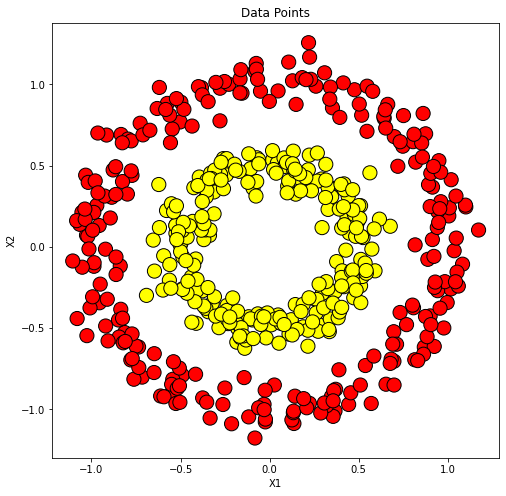

In [ ]:
X, y = make_circles(500, factor=0.5, noise=0.08)
y[y==0] = -1
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, s=200, edgecolor='k', cmap='autumn')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Points')
plt.show()

In [ ]:
svm = SVMDualProblem(C=1.0, kernel='poly', degree=2)
svm.fit(X, y, lr=1e-3)
print('train score: ', svm.score(X, y))
svm.plot_decision_boundary()

(500,)
(500, 2)


ValueError: ignored